<a href="https://colab.research.google.com/github/c21p/Capstone-Project/blob/main/Prediction_of_Credit_Card_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICT CREDIT CARD APPROVAL**

---




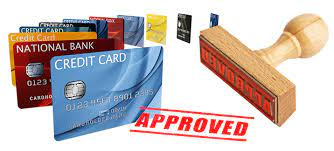



#**Introduction**

Banks are one of the major backbone of the economy. The entire banking sectors works with the principal of matching up creditors and borrowers, and they create revenue for themselves also in the process.

These days Credit Card holder form a major source borrowers because of its ease of usage in regular activities like shopping.

Predicting good client is crucial for banks to minimize bad loans and to maintain a low NPA and make informed lending decisions in today's world as DATA SCIENCE & ML are becoming important to financial institution. It also helps in maintaining profitability, minimizing the risk of fraudulent activities, and enhancing the customer experience.

If we could get some more general information like the amount of direct tax paid or filed in last 5-10 years or not and amount of physical/liquid assests holdings, then we can able to predict the maximum amount of credit limit bandwidth he/she would be worthy.

**Overview of the dataset**

---




We will work on `Credit_card.csv` dataset which contains 18 features and 1548 observations. Each observation contains personal, financial, and employment data of an individual. The target variable is binary and is stored in `Credit_card_label.csv` file.



Out of 18 features 6 are numerical and the rest are categorical. We will explore the dataset further in our analysis.


Steps in the entire project:


**`Steps in the entire project:`**
1. Understanding the data
2. EDA and Data Preprocessing
3. Feature Engineering
4. Model Building and Performance Evaluation

#Datasets Details:



*   `Credit_Card.csv`

        Variables:     Description

---



          Ind_ID:          Client ID

          Gender:          Gender information

          Car_owner:       Having car or not

          Propert_owner:   Having property or not

          Children:        Count of children

          Annual_income:   Annual income

          Type_Income:     Income type

          Education:       Education level

          Marital_status:  Marital_status

          Housing_type:    Living style

          Birthday_count:  Use backward count from current day (0), -1 means yesterday.

          Employed_days:   Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

          Mobile_phone:    Any mobile phone

          Work_phone:      Any work phone

          Phone:           Any phone number

          EMAIL_ID:        Any email ID

          Type_Occupation: Occupation

          Family_Members:  Family size




*   `Credit_card_label.csv`

        Variables:      Description
---

          ID:               The joining key between application data and credit status data, same is Ind_ID

          Label:            0 is application approved and 1 is application rejected.



In [ ]:
# Libraries for analysis & visuals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Libraries for model building and performance evaluation
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
# Importing the dataset
df1 = pd.read_csv('/content/Credit_card_label.csv')
df1

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [ ]:
#Extracting the data
df2 = pd.read_csv('/content/Credit_card.csv')
df2

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [ ]:
# Merging the datasets on common column
df = pd.merge(df1, df2, how='inner', on='Ind_ID')
df.head()

,Ind_ID,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,1,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,1,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
# Shape of the dataset
n,m = df.shape
print(f'The Dataset has {n} rows and {m} columns')

The Dataset has 1548 rows and 19 columns


In [ ]:
# Brief description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   label            1548 non-null   int64  
 2   GENDER           1541 non-null   object 
 3   Car_Owner        1548 non-null   object 
 4   Propert_Owner    1548 non-null   object 
 5   CHILDREN         1548 non-null   int64  
 6   Annual_income    1525 non-null   float64
 7   Type_Income      1548 non-null   object 
 8   EDUCATION        1548 non-null   object 
 9   Marital_status   1548 non-null   object 
 10  Housing_type     1548 non-null   object 
 11  Birthday_count   1526 non-null   float64
 12  Employed_days    1548 non-null   int64  
 13  Mobile_phone     1548 non-null   int64  
 14  Work_Phone       1548 non-null   int64  
 15  Phone            1548 non-null   int64  
 16  EMAIL_ID         1548 non-null   int64  
 17  Type_Occupatio

In [ ]:
# Number of unique categories
df.nunique()

Ind_ID             1548
label                 2
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
dtype: int64

In [ ]:
# Checking unique values in each column

for i in df:
  print(i, ':', df[i].unique())

Ind_ID : [5008827 5009744 5009746 ... 5115992 5118219 5053790]
label : [1 0]
GENDER : ['M' 'F' nan]
Car_Owner : ['Y' 'N']
Propert_Owner : ['Y' 'N']
CHILDREN : [ 0  1  2  4  3 14]
Annual_income : [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69

In [ ]:
# Checking for duplicates, if any
df.duplicated().sum()

0

In [ ]:
#Sum of Null values in each columns
df.isna().sum()

Ind_ID               0
label                0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

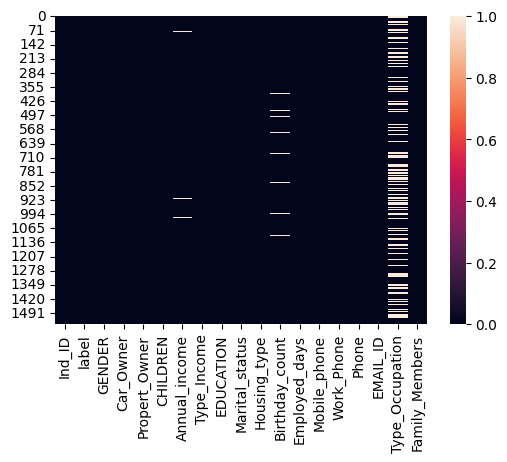

In [ ]:
#Visualization of Null values in each columns
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
#unique columns
df.columns

Index(['Ind_ID', 'label', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [ ]:
#checking categorical dtypes
categorical_dtypes = df.dtypes[df.dtypes == 'object'].index
categorical_dtypes

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')

In [ ]:
#unique and total columns count in categorical dtypes
df[categorical_dtypes].describe()

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


In [ ]:
# %age of null values in each columns
round((df.isna().sum()/len(df))*100,2)

Ind_ID              0.00
label               0.00
GENDER              0.45
Car_Owner           0.00
Propert_Owner       0.00
CHILDREN            0.00
Annual_income       1.49
Type_Income         0.00
EDUCATION           0.00
Marital_status      0.00
Housing_type        0.00
Birthday_count      1.42
Employed_days       0.00
Mobile_phone        0.00
Work_Phone          0.00
Phone               0.00
EMAIL_ID            0.00
Type_Occupation    31.52
Family_Members      0.00
dtype: float64

`Type_Occupation` has only more than 30% null values.

Other all `cols` have less than 2% null values.

In [ ]:
#Different types of data in 'Types_Occupation'
df['Type_Occupation'].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [ ]:
#Since Type_Occupation has more than 30% null values and the data is diversified,
#hence we can't filled the null values with a particular mean/median/mode.
#Therefore we would drop it.
df = df.drop('Type_Occupation',axis=1)

In [ ]:
#The following cols isn't vital in determining the approval/rejection of credit cards.
df.drop(['Mobile_phone','Work_Phone','Phone','EMAIL_ID'],axis=1,inplace = True)

In [ ]:
# Setting the index
df.set_index('Ind_ID', drop =True, inplace = True)

In [ ]:
df.tail()

,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
Ind_ID,,,,,,,,,,,,,
5028645,0,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,2
5023655,0,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1
5115992,0,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,4
5118219,0,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,2
5053790,0,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,2


In [ ]:
df.shape

(1548, 13)

In [ ]:
df.isna().sum()

label              0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count    22
Employed_days      0
Family_Members     0
dtype: int64

In [ ]:
#unique value in Gender col
df['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [ ]:
#Removing null values in 'Gender' col
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])

In [ ]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
df.isna().sum()

label              0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count    22
Employed_days      0
Family_Members     0
dtype: int64

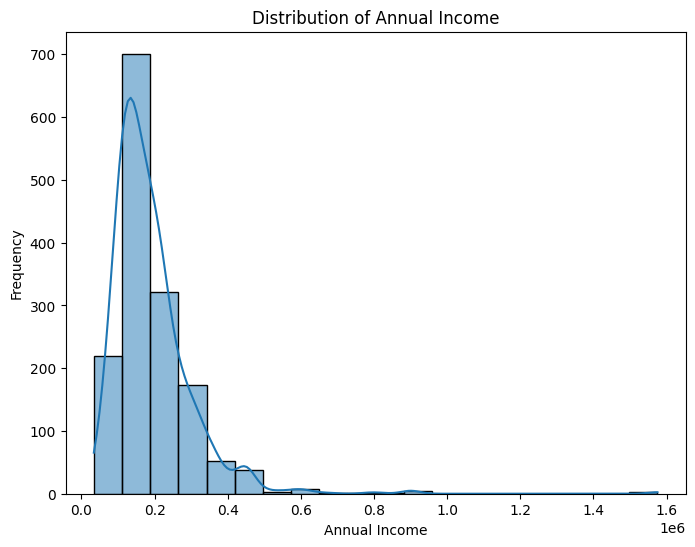

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual_income'], bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Annual_income'].skew()

3.9245642452364167

In [ ]:
#Filling the missing values with KNN imputation
#mean and median can be effected by skewness but knn imputation does not get effected (numerical var).
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()

In [ ]:
df['Annual_income'] = knn_imputer.fit_transform(df[['Annual_income']])

In [ ]:
df['Annual_income'].skew()

3.9539906923740133

In [ ]:
df['Birthday_count'].skew()

-0.17108666821145055

<Axes: ylabel='Birthday_count'>

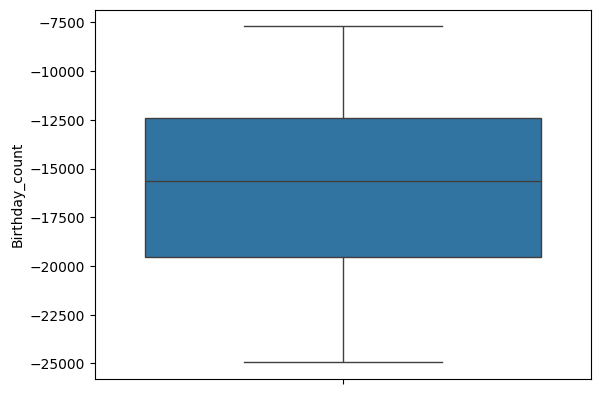

In [ ]:
sns.boxplot(df['Birthday_count'])

In [ ]:
#since no outlier, we can use mean
df['Birthday_count'] = df['Birthday_count'].fillna(df['Birthday_count'].mean())

In [ ]:
#all null values are filled
df.isna().sum()

label             0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Family_Members    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 5008827 to 5053790
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   label           1548 non-null   int64  
 1   GENDER          1548 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   CHILDREN        1548 non-null   int64  
 5   Annual_income   1548 non-null   float64
 6   Type_Income     1548 non-null   object 
 7   EDUCATION       1548 non-null   object 
 8   Marital_status  1548 non-null   object 
 9   Housing_type    1548 non-null   object 
 10  Birthday_count  1548 non-null   float64
 11  Employed_days   1548 non-null   int64  
 12  Family_Members  1548 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 169.3+ KB


In [ ]:
df.describe()

,label,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members
count,1548.000000,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.000000
mean,0.113049,0.412791,1.913993e+05,-16040.342071,59364.689922,2.161499
std,0.316755,0.776691,1.124080e+05,4199.321477,137808.062701,0.947772
min,0.000000,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000
25%,0.000000,0.000000,1.215000e+05,-19476.000000,-3174.500000,2.000000
50%,0.000000,0.000000,1.710000e+05,-15814.500000,-1565.000000,2.000000
75%,0.000000,1.000000,2.250000e+05,-12483.000000,-431.750000,3.000000
max,1.000000,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000


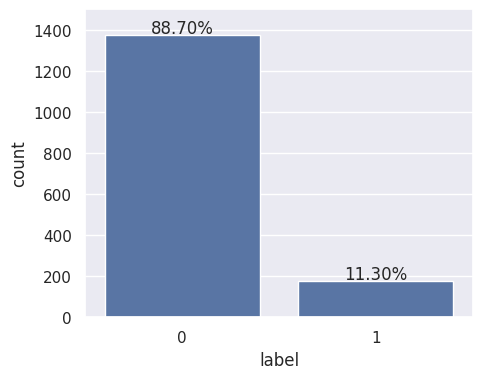

In [ ]:
# Count of occurances of approved and rejected applications
sns.set(rc= {'figure.figsize':  (5,4)})
ax = sns.countplot(x = df['label'])

for i in ax.patches:
    percentage = '{:.2f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+10
    ax.annotate(percentage, (x, y), ha='center')

plt.ylim((0,1500))
plt.show()

**Observations:**

1. The target variable is binary and is highly imbalanced having 88.7% data belonging to Class 0 (Applications Approved) and 11.3% data belonging to Class 1 (Applications Rejected).

2. Here, we can clearly observe imbalance in the data where maximum number applicants are of whose application is approved.

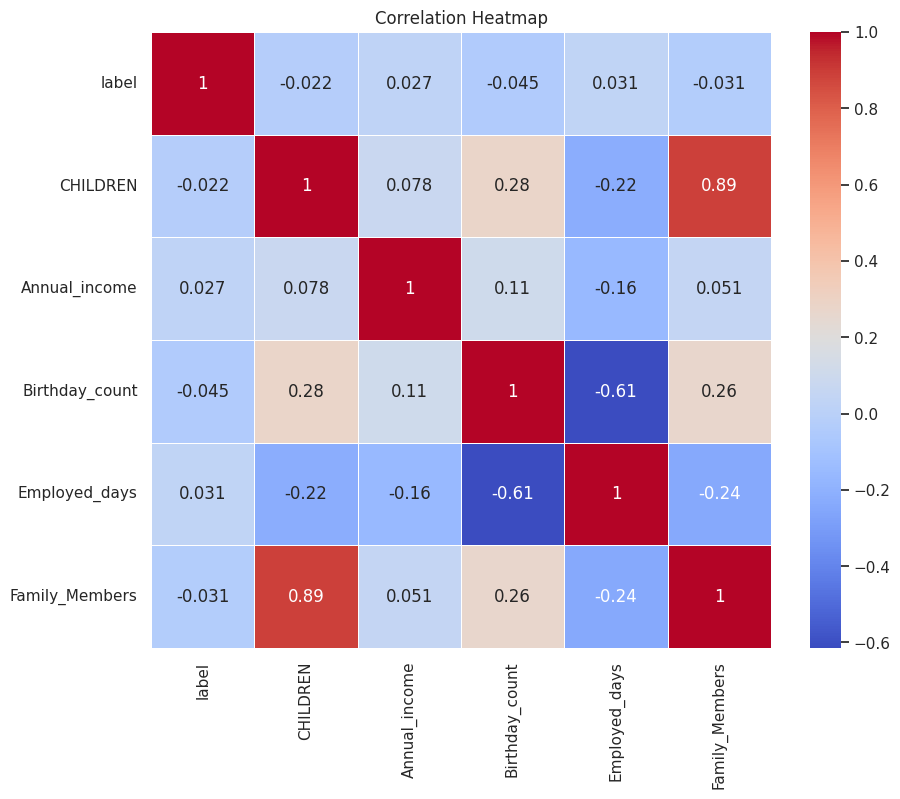

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Here we can observe the **strong correlation** between **children** and **family_members**.

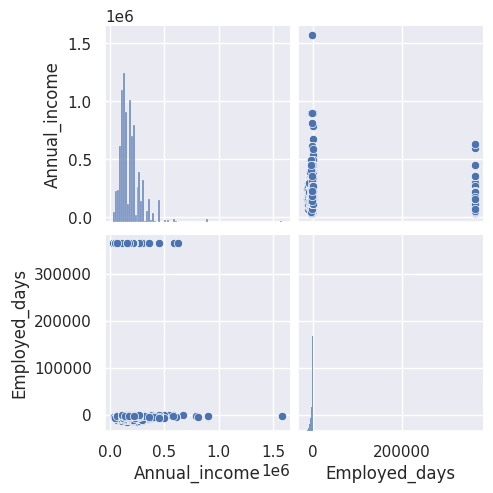

In [ ]:
sns.pairplot(df, vars=['Annual_income', 'Employed_days'])
plt.show()

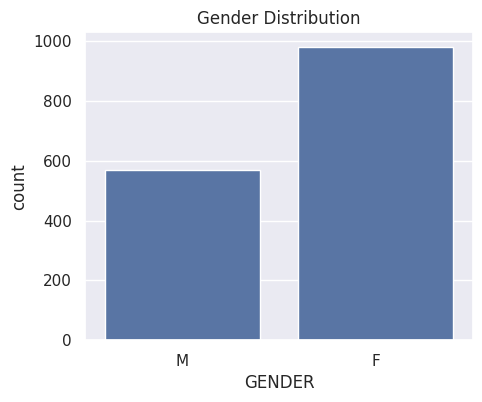

In [ ]:
sns.countplot(data = df, x='GENDER')
plt.title('Gender Distribution')
plt.show()

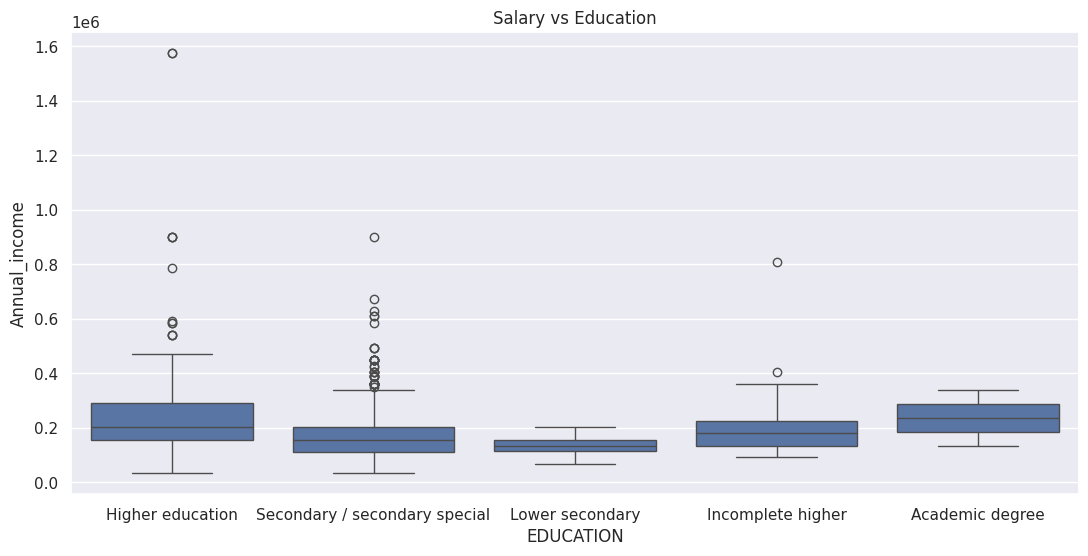

In [ ]:
plt.figure(figsize=(13,6))
plt.title("Salary vs Education")
sns.boxplot(data= df, x="EDUCATION",y="Annual_income")
plt.show()

<Axes: ylabel='Annual_income'>

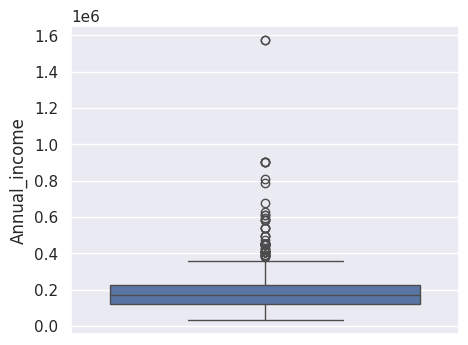

In [ ]:
sns.boxplot(df['Annual_income'])

<Axes: ylabel='Family_Members'>

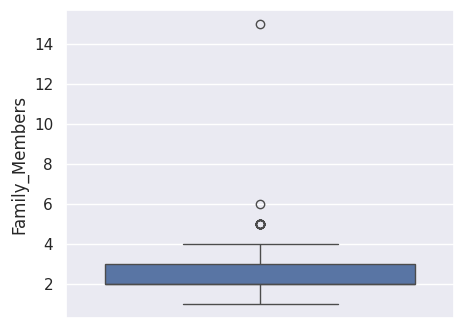

In [ ]:
sns.boxplot(y=df['Family_Members'])

<Axes: ylabel='CHILDREN'>

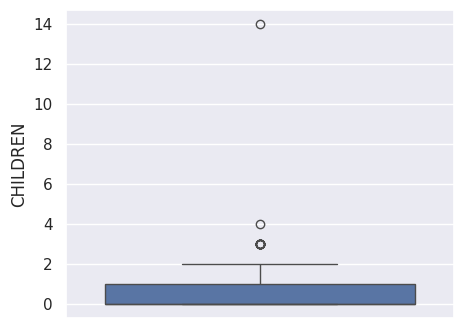

In [ ]:
sns.boxplot(y=df['CHILDREN'])

**Univariate Analysis**

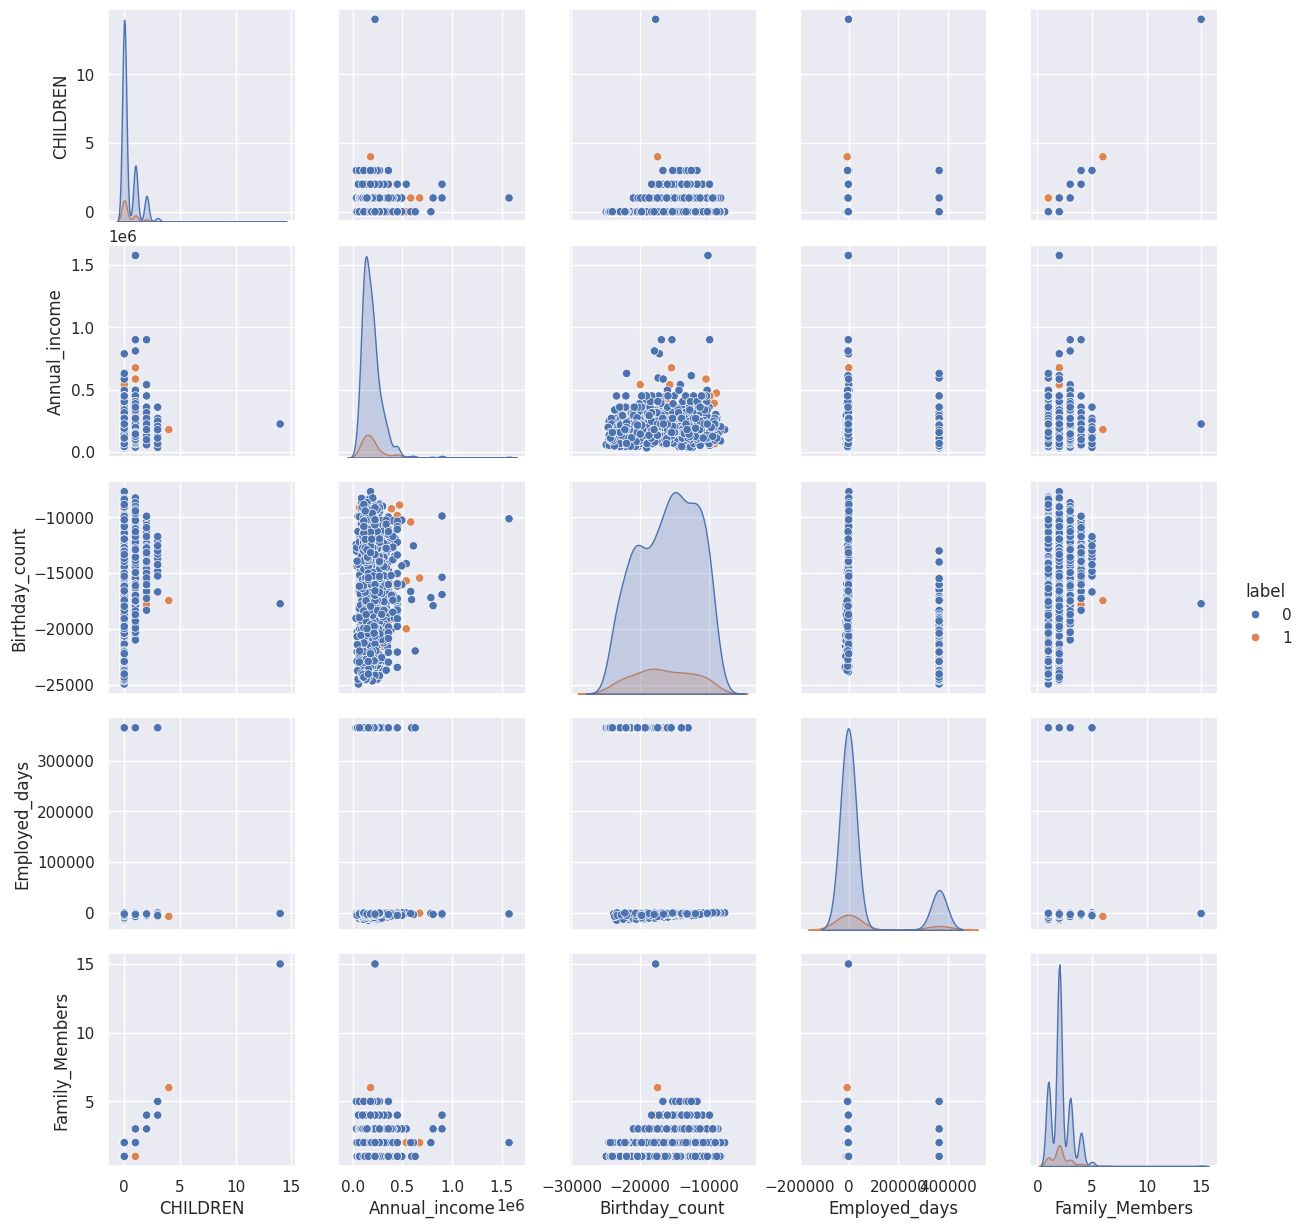

In [ ]:
# Setting the plot size
sns.set(rc={'figure.figsize':(20, 20)}, style = 'darkgrid')

# Overall pattern of data
sns.pairplot(df, diag_kind = 'kde', hue = 'label')

**Observations:**


The scatter plots mostly shows randomness. We can only see the linear relationship between Family Members and number of children, which is obvious because if number of children increases then family size also increases.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 5008827 to 5053790
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   label           1548 non-null   int64  
 1   GENDER          1548 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   CHILDREN        1548 non-null   int64  
 5   Annual_income   1548 non-null   float64
 6   Type_Income     1548 non-null   object 
 7   EDUCATION       1548 non-null   object 
 8   Marital_status  1548 non-null   object 
 9   Housing_type    1548 non-null   object 
 10  Birthday_count  1548 non-null   float64
 11  Employed_days   1548 non-null   int64  
 12  Family_Members  1548 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 169.3+ KB


In [ ]:
# Converting the datatypes of categorical columns to 'category' for performance optimization
cols = ['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type','label']
df[cols] = df[cols].astype('category')
df.dtypes

label             category
GENDER            category
Car_Owner         category
Propert_Owner     category
CHILDREN             int64
Annual_income      float64
Type_Income       category
EDUCATION         category
Marital_status    category
Housing_type      category
Birthday_count     float64
Employed_days        int64
Family_Members       int64
dtype: object

#Analysis of Categorical data

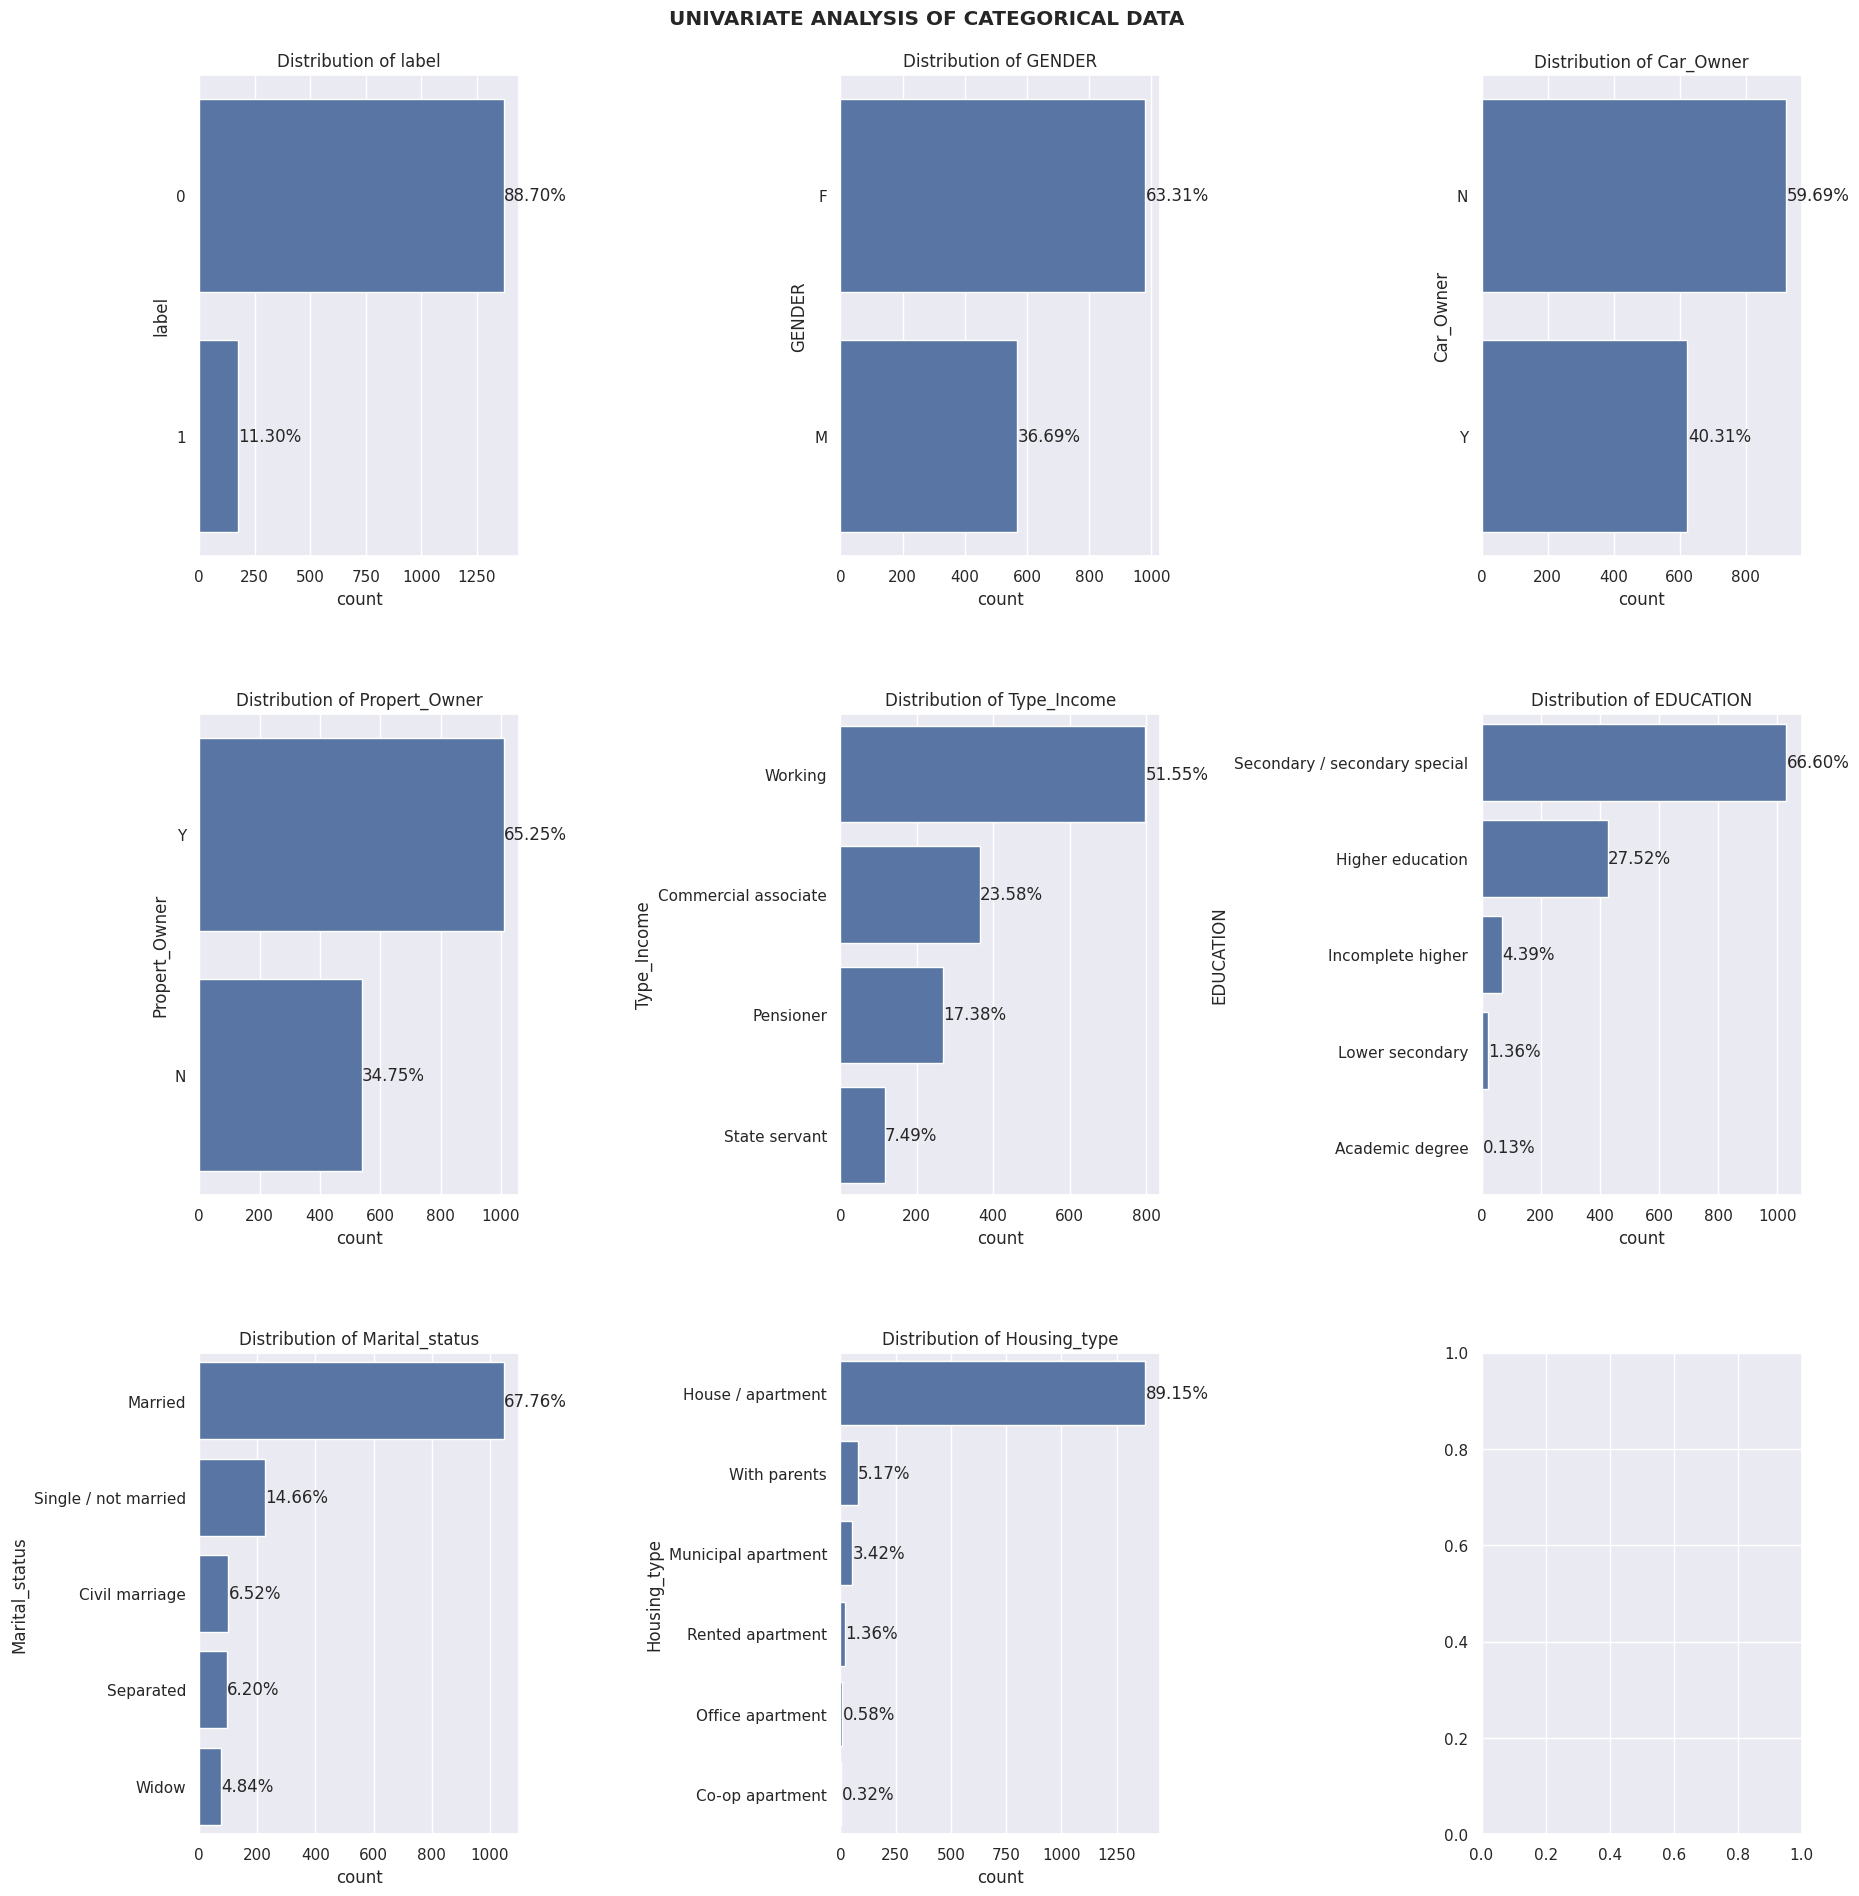

In [ ]:
# Univariate analysis of Categorical Columns

fig, axes = plt.subplots(3,3) # Creating the subplots for clear and concise summary
axes = axes.flatten()
j = 0

for i in df.dtypes.items():
    if i[1] == 'category':
        ax = sns.countplot(y=df[i[0]], ax = axes[j], order = df[i[0]].value_counts().index)
        j+=1
        ax.set_xticklabels
        ax.set_title(f"Distribution of {i[0]}")

        for k in ax.patches:
            percentage = '{:.2f}%'.format(100 * k.get_width()/len(df))
            x = k.get_y()+ k.get_height()/2
            y = k.get_width()+1
            ax.annotate(percentage, (y, x), va='center')
    else:
        pass

fig.tight_layout(w_pad=0.5, pad = 5)
fig.suptitle("UNIVARIATE ANALYSIS OF CATEGORICAL DATA", fontweight = 'bold')
plt.show()

**Observations:**
1. In the data, we have around 63% females and 37% males.
2. 60% of the individuals don't own any car
3. 65% of the individuals are property owners
4. Overall the people have low education background. About 67% of the folks have secondary education, 27% have pursued higher education and only 0.13% have an academic degree.
5. About 68% people are married and 15% are unmarried, 6.5% people have performed civil marriage while about 11% are separated and widowed
6. Maximum people(about 89%) are living in their own houses/apartments, while about 5% are living with parents and the rest are living in municipal apartment or on rent.


#Analysis of Numerical Data

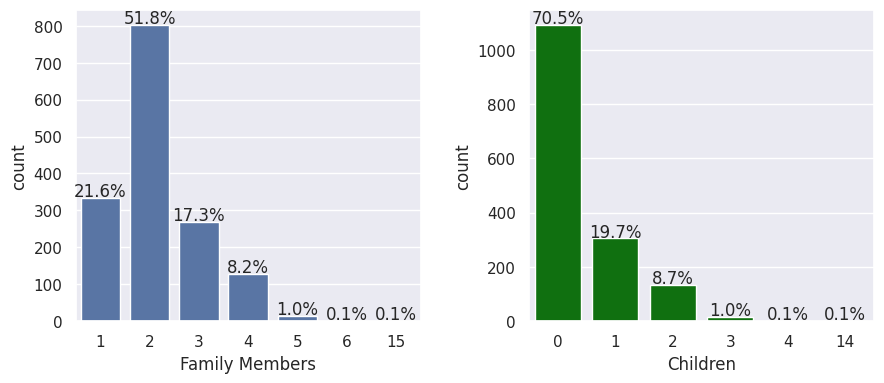

In [ ]:
#Setting the figure size
plt.figure(figsize = (9,4))

#Plotting graphs in subplots
plt.subplot(121)
ax = sns.countplot(x = df['Family_Members'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Family Members")

plt.subplot(122)
ax = sns.countplot(x = df['CHILDREN'],color='green')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')
plt.xlabel("Children")

plt.tight_layout(w_pad = 2)

**Observations:**

1.   About 52% individuals have a family of 2 members
2.   About 70% people don't have any children.

**Bivariate and Multi-variate Analysis**

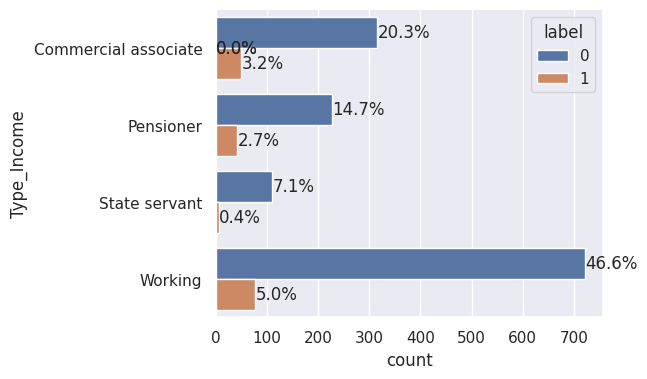

In [ ]:
# Checking the distribution of type_income by label
sns.set(rc = {'figure.figsize': (5,4)}) # Setting the figure size
ax = sns.countplot(y= df['Type_Income'], hue= df['label'])

for k in ax.patches:
    percentage = '{:.1f}%'.format(100 * k.get_width()/len(df['Type_Income']))
    x = k.get_y()+ k.get_height()/2
    y = k.get_width()+1
    ax.annotate(percentage, (y, x), va='center')

plt.show()

**Observations:**


1. Most of the individuals are working, so their accepted and rejected rate is higher.
2. State Servant category has the highest accepted to rejected application ratio and then comes the working category individuals.
3. Pensioner category has the lowest accepted to rejected applications ratio.

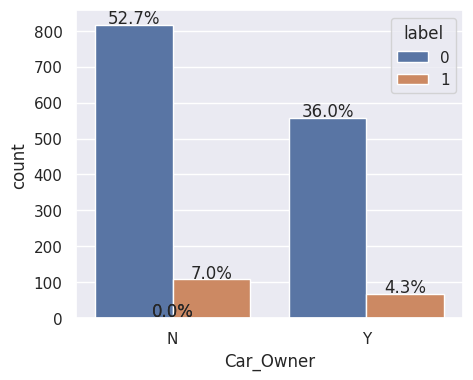

In [ ]:
# Checking the distribution of car_owner by label
ax= sns.countplot(x= df['Car_Owner'], hue= df['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

**Observations:**

1. Persons not having a car have higher rejection rate.
2. Those who own a car have higher chances of credit applications to be accepted.

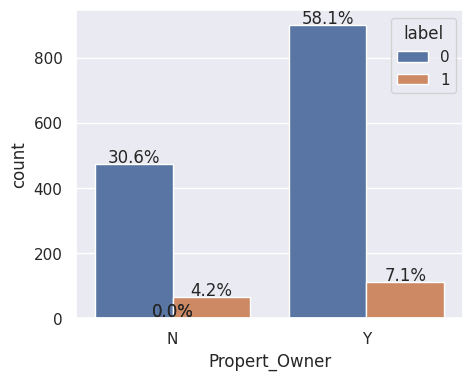

In [ ]:
# Checking the distribution of propert_owner by label
ax = sns.countplot(x= df['Propert_Owner'], hue= df['label'])

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

**Observations:**

1. Individuals owning a property have a higher rejection rate.
2. But, the accepted to rejected applications ratio is also higher, which indicates people owning a property have a higher chances of approval of credit applications.

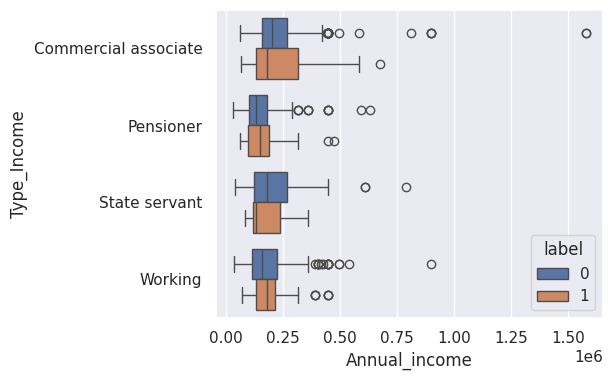

In [ ]:
# Distribution of annual income by category for each label
sns.boxplot(x= df['Annual_income'], y= df['Type_Income'], hue = df['label'])
plt.show()

**Observations:**

1. Not much variation can be seen in the distribution of annual incomes of accepted and rejected applicants.
2. However, Commercial associates have higher annual income compared to the all other categories. They also have more extreme outliers.
3. The median income of rejected applicants seems to be more or less same as the median income of accepted applicants of the same category. State servants whose applications were rejected have lower annual income than those of accepted applicants of the same category

In [ ]:
df.columns

Index(['label', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Family_Members'],
      dtype='object')

In [ ]:
df.head()

,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
Ind_ID,,,,,,,,,,,,,
5008827,1,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,2
5009744,1,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,2
5009746,1,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,2
5009749,1,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,2
5009752,1,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 5008827 to 5053790
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   label           1548 non-null   category
 1   GENDER          1548 non-null   category
 2   Car_Owner       1548 non-null   category
 3   Propert_Owner   1548 non-null   category
 4   CHILDREN        1548 non-null   int64   
 5   Annual_income   1548 non-null   float64 
 6   Type_Income     1548 non-null   category
 7   EDUCATION       1548 non-null   category
 8   Marital_status  1548 non-null   category
 9   Housing_type    1548 non-null   category
 10  Birthday_count  1548 non-null   float64 
 11  Employed_days   1548 non-null   int64   
 12  Family_Members  1548 non-null   int64   
dtypes: category(8), float64(2), int64(3)
memory usage: 86.0 KB


Here, we will use Ordinal Encoding for education and Label Encoding for rest of the categorical features

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

# Assigning order of education for encoding
edu_category = ['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']


In [ ]:
# Storing encoding classes to objects
label_encode = LabelEncoder()
ordinal_encode = OrdinalEncoder(categories = [edu_category])
# Transforming and modifying the variables in training set
df['EDUCATION'] = ordinal_encode.fit_transform(df[['EDUCATION']])


In [ ]:
df.head()

,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
Ind_ID,,,,,,,,,,,,,
5008827,1,M,Y,Y,0,180000.00000,Pensioner,3.0,Married,House / apartment,-18772.000000,365243,2
5009744,1,F,Y,N,0,315000.00000,Commercial associate,3.0,Married,House / apartment,-13557.000000,-586,2
5009746,1,F,Y,N,0,315000.00000,Commercial associate,3.0,Married,House / apartment,-16040.342071,-586,2
5009749,1,F,Y,N,0,191399.32623,Commercial associate,3.0,Married,House / apartment,-13557.000000,-586,2
5009752,1,F,Y,N,0,315000.00000,Commercial associate,3.0,Married,House / apartment,-13557.000000,-586,2


In [ ]:
# Storing columns for label encoding in a list
cols = ['Type_Income','Marital_status','Housing_type','GENDER','Car_Owner','Propert_Owner']

# Transforming and modifying the variables in training set
for i in cols:
    df[i] = label_encode.fit_transform(df[i])

In [ ]:
df.head()

,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
Ind_ID,,,,,,,,,,,,,
5008827,1,1,1,1,0,180000.00000,1,3.0,1,1,-18772.000000,365243,2
5009744,1,0,1,0,0,315000.00000,0,3.0,1,1,-13557.000000,-586,2
5009746,1,0,1,0,0,315000.00000,0,3.0,1,1,-16040.342071,-586,2
5009749,1,0,1,0,0,191399.32623,0,3.0,1,1,-13557.000000,-586,2
5009752,1,0,1,0,0,315000.00000,0,3.0,1,1,-13557.000000,-586,2


In [ ]:
df5= pd.get_dummies(df[['GENDER','Car_Owner','Propert_Owner','Type_Income','EDUCATION','Marital_status','Housing_type']],drop_first=True)
df5

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
Ind_ID,,,,,,,
5008827,1,1,1,1,3.0,1,1
5009744,0,1,0,0,3.0,1,1
5009746,0,1,0,0,3.0,1,1
5009749,0,1,0,0,3.0,1,1
5009752,0,1,0,0,3.0,1,1
...,...,...,...,...,...,...,...
5028645,0,0,1,0,3.0,1,1
5023655,0,0,0,0,2.0,3,1
5115992,1,1,1,3,3.0,1,1


In [ ]:
# Skewness values of non-categorical columns

print(f"Skewness of Children\t\t:{df['CHILDREN'].skew()}")
print(f"Skewness of Annual Income\t:{df['Annual_income'].skew()}")
print(f"Skewness of Birthday_Count\t:{df['Birthday_count'].skew()}")
print(f"Skewness of Employed_days\t:{df['Employed_days'].skew()}")

Skewness of Children		:4.631121894695182
Skewness of Annual Income	:3.9539906923740133
Skewness of Birthday_Count	:-0.17231310329107838
Skewness of Employed_days	:1.770964333419757


Skewness should be between -1 to +1 for normal distribution.

In [ ]:
#Checking value counts to understand the extreme values
df['Employed_days'].value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-3034        1
-1324        1
-3112        1
-2959        1
-2859        1
Name: Employed_days, Length: 956, dtype: int64

If we observe the `Employed_days` variable then we will find that there are some extreme positive values which are affecting the regular pattern of the data. Since, positive values indicate that the individual is unemployed so we can simply replace those values with +1 which will help in preserving the pattern of the data.

In [ ]:
# Replacing extreme values of employed days to 1
df.loc[df['Employed_days']>0, ['Employed_days']] = 1

<Axes: xlabel='Employed_days', ylabel='Count'>

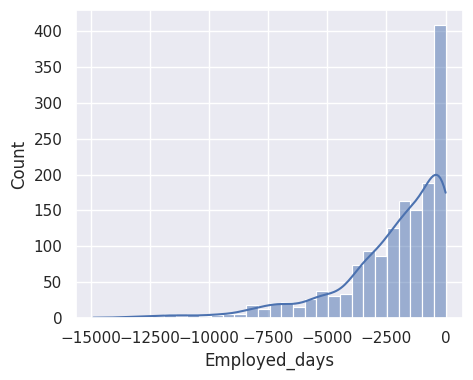

In [ ]:
# Checking the distrbution after replacing extreme values
plt.figure(figsize = (5,4))
sns.histplot(x = df['Employed_days'], bins = 30, kde = True)


If we look at `Employed_days` and `Birthday_count` columns, they are only justifying the Work Experience and Age of an individual respectively. So, let's convert these columns which will help in clear understanding and ease in analysis.






In [ ]:
# Creating new columns by extracting data from other feartures
df['Work_experience'] = np.ceil(-df['Employed_days'] / 365.25) #Converting days to years

df['Age'] = np.ceil(-df['Birthday_count'] / 365.25)

# Checking the dataset
df.head()

,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members,Work_experience,Age
Ind_ID,,,,,,,,,,,,,,,
5008827,1,1,1,1,0,180000.00000,1,3.0,1,1,-18772.000000,1,2,-0.0,52.0
5009744,1,0,1,0,0,315000.00000,0,3.0,1,1,-13557.000000,-586,2,2.0,38.0
5009746,1,0,1,0,0,315000.00000,0,3.0,1,1,-16040.342071,-586,2,2.0,44.0
5009749,1,0,1,0,0,191399.32623,0,3.0,1,1,-13557.000000,-586,2,2.0,38.0
5009752,1,0,1,0,0,315000.00000,0,3.0,1,1,-13557.000000,-586,2,2.0,38.0


We have now actually performed a part feature engineering by extracting data from other features.

Let's check the difference in skewness of older and new variables

In [ ]:
# Skewness values of original columns and Extracted columns

print(f"Skewness of Employed_Days\t:{df['Employed_days'].skew()}")
print(f"Skewness of Work Experience\t:{df['Work_experience'].skew()}")
print(f"Skewness of Birthday_Count\t:{df['Birthday_count'].skew()}")
print(f"Skewness of Age\t\t\t:{df['Age'].skew()}")

Skewness of Employed_Days	:-1.7296023658309658
Skewness of Work Experience	:1.661916218120766
Skewness of Birthday_Count	:-0.17231310329107838
Skewness of Age			:0.17436336181229417


Not much difference can be seen, just the magnitude is changed.

Now, that we have created new columns, we will delete the older ones in order to avoid multicollinearity issue.



In [ ]:
#To avoid collinearity, we drop them
df.drop(columns = ['Birthday_count', 'Employed_days'], inplace = True)

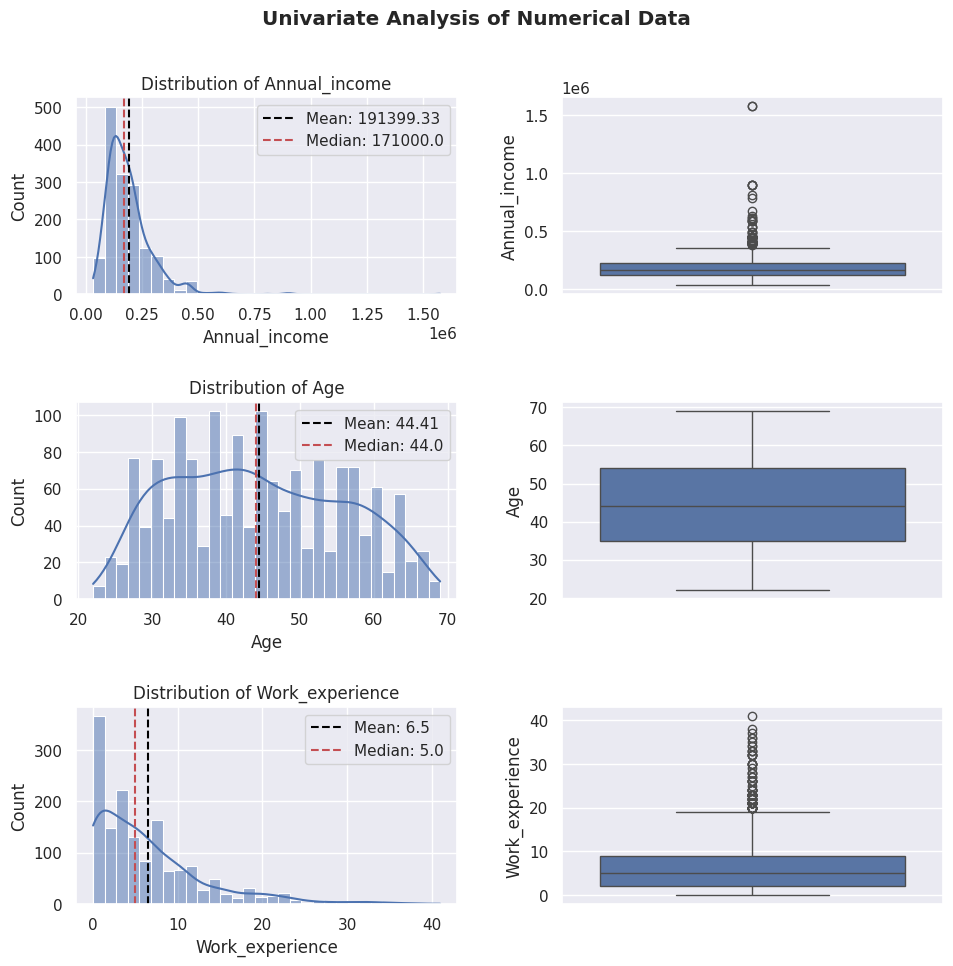

In [ ]:
cols = ['Annual_income','Age', 'Work_experience']

sns.set(rc = {'figure.figsize': (10,10)}) # Setting the figure size
fig, axes = plt.subplots(3,2) # Creating the subplots for clear and concise summary
axes = axes.flatten()
j = 0
k = 1

for i in df[cols].dtypes.items():
    ax = sns.histplot(x=df[i[0]], ax = axes[j], kde = True, bins = 30)
    ax.axvline(x = df[i[0]].mean(), c= 'black', ls = '--', label =f"Mean: {round(df[i[0]].mean(), 2)}")
    ax.axvline(x = df[i[0]].median(), c= 'r', ls = '--', label =f"Median: {round(df[i[0]].median(), 2)}")
    ax.set_title(f"Distribution of {i[0]}")
    ax.legend()

    j+=2

for i in df[cols].dtypes.items():
    ax= sns.boxplot(y = df[i[0]], ax = axes[k])
    k+=2

plt.suptitle("Univariate Analysis of Numerical Data", fontweight ='bold')
plt.tight_layout(w_pad = 2, pad = 2)
plt.show()

**Observations:**
1. In the histogram, we can observe that `Annual_income` and `Work_experience` is right skewed.

2. As well as, in the boxplot, we can observe that there are some outliers in `Annual_income` and `Work_experience`.

#Treating the Outliers
By Feature Transformation



In [ ]:
df

,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Work_experience,Age
Ind_ID,,,,,,,,,,,,,
5008827,1,1,1,1,0,180000.00000,1,3.0,1,1,2,-0.0,52.0
5009744,1,0,1,0,0,315000.00000,0,3.0,1,1,2,2.0,38.0
5009746,1,0,1,0,0,315000.00000,0,3.0,1,1,2,2.0,44.0
5009749,1,0,1,0,0,191399.32623,0,3.0,1,1,2,2.0,38.0
5009752,1,0,1,0,0,315000.00000,0,3.0,1,1,2,2.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028645,0,0,0,1,0,191399.32623,0,3.0,1,1,2,6.0,33.0
5023655,0,0,0,0,0,225000.00000,0,2.0,3,1,1,4.0,29.0
5115992,0,1,1,1,2,180000.00000,3,3.0,1,1,4,7.0,37.0


In [ ]:
# Log transformation on Annual_income
df['Annual_income'] = np.log(df['Annual_income'])

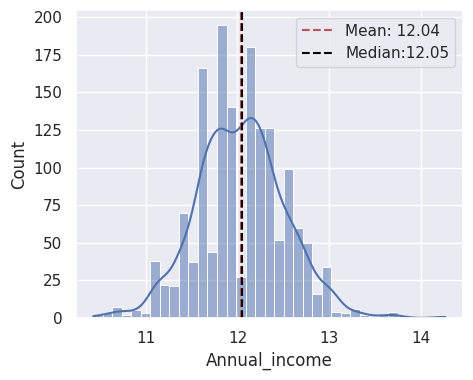

In [ ]:
# Visualizing the distribution after transformation of data
sns.set(rc= {'figure.figsize':  (5,4)})
sns.histplot(x = df['Annual_income'], kde = True)
plt.axvline(x= df['Annual_income'].mean(), c='r', ls= '--', label = f"Mean: {round(df['Annual_income'].mean(),2)}")
plt.axvline(x= df['Annual_income'].median(), c='black', ls= '--', label = f"Median:{round(df['Annual_income'].median(),2)}")
plt.legend()
plt.show()

In [ ]:
# Checking the skewness
df['Annual_income'].skew()

0.19148195906369192

We can observe that the distribution of data in the datasets is now almost normally distributed.



In [ ]:
# Square Root Transformation on Work_experience
df['Work_experience'] = np.sqrt(df['Work_experience'])

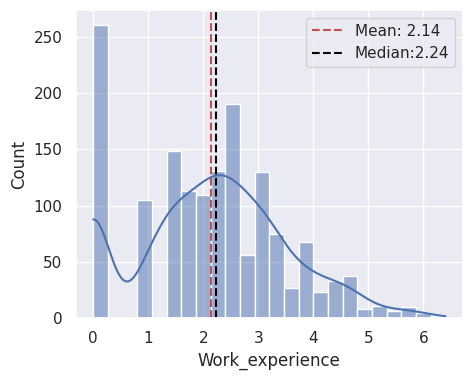

In [ ]:
# Visualizing the distribution after transformation of data
sns.histplot(x = df['Work_experience'], kde = True)
plt.axvline(x= df['Work_experience'].mean(), c='r', ls= '--', label = f"Mean: {round(df['Work_experience'].mean(),2)}")
plt.axvline(x= df['Work_experience'].median(), c='black', ls= '--', label = f"Median:{round(df['Work_experience'].median(),2)}")
plt.legend()
plt.show()

In [ ]:
df['Work_experience'].skew()

0.15720267100669824

***The distributions is now normally distributed.***

**Feature Scaling**

By Standardization method: X(stand) = {X-Mean(X)}/Standard Deviation(X)

In this method, each value is converted to corresponding z-score in the range of -4 to +4.

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

# Storing Numerical columns needed to be scaled in a list
cols =['Annual_income', 'Age', 'Work_experience']
# Replacing original values with scaled values in training set
df[cols] = pd.DataFrame(scale.fit_transform(df[cols]),columns = cols, index = df.index)

df.head()

,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Work_experience,Age
Ind_ID,,,,,,,,,,,,,
5008827,1,1,1,1,0,0.127596,1,3.0,1,1,2,-1.554948,0.660126
5009744,1,0,1,0,0,1.282345,0,3.0,1,1,2,-0.529142,-0.557635
5009746,1,0,1,0,0,1.282345,0,3.0,1,1,2,-0.529142,-0.035737
5009749,1,0,1,0,0,0.254303,0,3.0,1,1,2,-0.529142,-0.557635
5009752,1,0,1,0,0,1.282345,0,3.0,1,1,2,-0.529142,-0.557635


# **MODEL BUILDING**

---

As we have done the required data preprocessing, now let's proceed further to building Machine Learning models. In this project, several machine learning models are build using different classification algorithms. The results obtained from each algorithm are then summarized.

**Performance Evaluation Metrics**

There are different metrics to evaluate the predictive performance of a Machine Learning model. These includes: Accuracy Score, Precision, Recall, F1 score.

In our case to make more accurate predictions for rejected applications which will help banks to control fraudulent activities, we need to have increased True Positives (correctly predicted rejected applications) and minimum False Negatives (wrongly predicted actual rejected applications), i.e., we need to focus more on the recall score.

**1. Logistic Regression Model**

In [ ]:
# Splitting the dataset
X = df.drop(columns = 'label')
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
#Modelling
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Make predictions on the testing data
y_pred = model_1.predict(X_test)

In [ ]:
# Accuracy Score for training data
print('Train Accuracy:',model_1.score(X_train, y_train))

Train Accuracy: 0.882875605815832


In [ ]:
print('Test Accuracy:', accuracy_score(y_test,y_pred))

Test Accuracy: 0.9032258064516129


In [ ]:
# Classification report to evaluate different performance metrics
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       280
           1       0.00      0.00      0.00        30

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.82      0.90      0.86       310



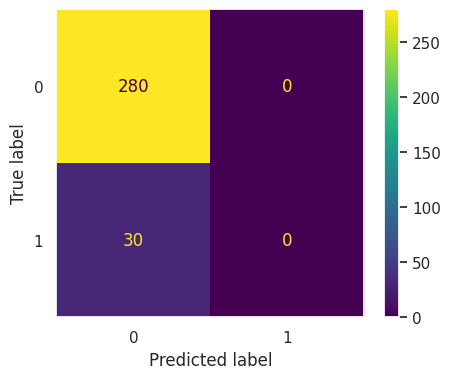

In [ ]:
# Confusion Matrix for overview of incorrect predictions
cm = confusion_matrix(y_test, y_pred, labels= model_1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_1.classes_)
disp.plot()
plt.grid()
plt.show()

The model predicts 0 cases of rejected applications. This model also failed to correctly classify 30 actually rejected applications.This is not a very good performing model.

**2. Decision Tree Classifier**

In [ ]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_test = model_2.predict(X_test)
y_pred_train = model_2.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train,y_pred_train))

print('Test Accuracy:', accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9919224555735057
Test Accuracy: 0.867741935483871


In [ ]:
# Classification report to evaluate different performance metrics
print("Classification Report:\n",classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       280
           1       0.33      0.37      0.35        30

    accuracy                           0.87       310
   macro avg       0.63      0.64      0.64       310
weighted avg       0.87      0.87      0.87       310



**Since model is overfitting, we will do Hyperparameter Tuning on reducing max_depth(pruning)**

In [ ]:
model_2 = DecisionTreeClassifier(max_depth=9)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [ ]:
y_pred_test = model_2.predict(X_test)
y_pred_train = model_2.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train,y_pred_train))

print('Test Accuracy:', accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9345718901453958
Test Accuracy: 0.8935483870967742


In [ ]:
# Classification report to evaluate different performance metrics
print("Classification Report:\n",classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       280
           1       0.38      0.17      0.23        30

    accuracy                           0.89       310
   macro avg       0.65      0.57      0.59       310
weighted avg       0.86      0.89      0.87       310



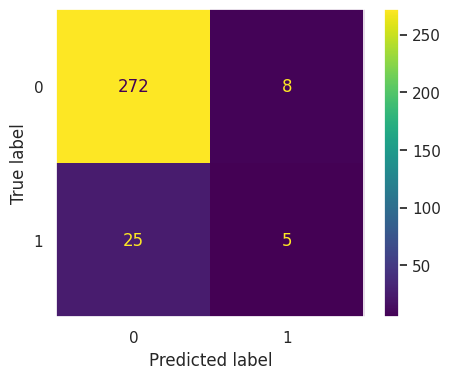

In [ ]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels= model_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_2.classes_)
disp.plot()
plt.grid()
plt.show()

The model predicts total 13 cases of rejected applications, out of which 5 are actually rejected. We got 8 False Positives and 25 False Negatives.

**3. Random Forest Classifier**

In [ ]:
# Defining the Classifier
model_3 = RandomForestClassifier()

In [ ]:
# Training the model
model_3.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predicting the results
y_pred = model_3.predict(X_test)

In [ ]:
# Accuracy Score
print("Accuracy Score:",model_3.score(X_test, y_test))

Accuracy Score: 0.9354838709677419


In [ ]:
# Accuracy Score

print('Test Accuracy:', accuracy_score(y_test,y_pred))

Test Accuracy: 0.9354838709677419


In [ ]:
# Classification Report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       280
           1       1.00      0.33      0.50        30

    accuracy                           0.94       310
   macro avg       0.97      0.67      0.73       310
weighted avg       0.94      0.94      0.92       310



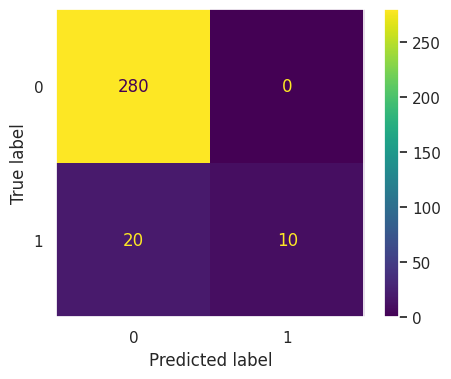

In [ ]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= model_3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_3.classes_)
disp.plot()
plt.grid()
plt.show()

The model predicts total 10 cases of actually 10 rejected applications. However we have 20 False Negatives,i.e.,actual rejected applications but model predicts it as accepted.

**4. XGBoost Classifier**


In [ ]:
# Initializing XGBoost Classifier
model_4 = XGBClassifier(random_state =0)

In [ ]:
# Fitting the model
model_4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
# Predicting the test results
y_pred = model_4.predict(X_test)

In [ ]:
# Checking the Accuracy
print('Test Accuracy:',model_4.score(X_test, y_test))

# print('Test Accuracy:', accuracy_score(y_test,y_pred))

Test Accuracy: 0.932258064516129


In [ ]:
# Claassification report for different evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       280
           1       1.00      0.30      0.46        30

    accuracy                           0.93       310
   macro avg       0.97      0.65      0.71       310
weighted avg       0.94      0.93      0.92       310



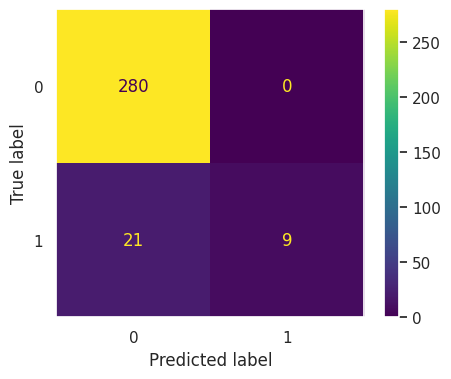

In [ ]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels= model_4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_4.classes_)
disp.plot()
plt.grid()
plt.show()

The model predicts total 21 cases of rejected applications as accepted.

#**SUMMARY**

After performing analysis and evaluating performance of different models, here is a summary of the accuracy from all the Machine learning algorithms performed here.

            Algorithms                  Accuracy

---



    1.    Logistic Regression         	0.9032
    2.	Decision Tree Classifier	    0.8935
    3.	Random Forest Classifier	    0.9355
    4.	XGBoost Classifier	          0.9322

**Based on the above accuracy score, Random Forest Classifier model performs the best.**

#**SQL**

In [ ]:
data = pd.merge(df1, df2, how='inner', on='Ind_ID')


In [ ]:
import duckdb

In [ ]:
conn = duckdb.connect()

In [ ]:
conn.register('data',data)

    Q1. Group the customers based on their income type and find the average of their annual income.





In [ ]:
conn.execute('SELECT Type_Income, AVG(Annual_income) AS avg_annual_income FROM data GROUP BY Type_Income').fetchdf()

,Type_Income,avg_annual_income
0,Pensioner,155175.096226
1,Working,181048.757306
2,State servant,211422.413793
3,Commercial associate,234600.000000


Since we have Standardized the data as well as applied label encoding on it, hence we would have got -ve avg annual income and Type_income as int if we have queried on df.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   label            1548 non-null   int64  
 2   GENDER           1541 non-null   object 
 3   Car_Owner        1548 non-null   object 
 4   Propert_Owner    1548 non-null   object 
 5   CHILDREN         1548 non-null   int64  
 6   Annual_income    1525 non-null   float64
 7   Type_Income      1548 non-null   object 
 8   EDUCATION        1548 non-null   object 
 9   Marital_status   1548 non-null   object 
 10  Housing_type     1548 non-null   object 
 11  Birthday_count   1526 non-null   float64
 12  Employed_days    1548 non-null   int64  
 13  Mobile_phone     1548 non-null   int64  
 14  Work_Phone       1548 non-null   int64  
 15  Phone            1548 non-null   int64  
 16  EMAIL_ID         1548 non-null   int64  
 17  Type_Occupatio

    Q2. Find the female owners of cars and property.


In [ ]:
conn.execute("SELECT gender, COUNT(*) AS Female_owners FROM data WHERE (car_owner = 'Y') AND (propert_owner = 'Y') AND (gender= 'F')"").fetchdf()


    Q3. Find the male customers who are staying with their families.


In [ ]:
conn.execute("SELECT gender, housing_type, COUNT(*) AS count FROM data WHERE gender = 'M' AND housing_type = 'With parents'").fetchdf()

    Q4. Please list the top five people having the highest income.



In [ ]:
conn.execute("SELECT * FROM data ORDER BY Annual_Income DESC LIMIT 5").fetchdf()

,Ind_ID,label,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5143231,0,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142.0,-2479,1,0,0,0,Managers,2
1,5143235,0,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142.0,-2479,1,0,0,0,Managers,2
2,5090470,0,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,-15380.0,-4509,1,0,0,0,Laborers,3
3,5079016,0,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-9889.0,-1000,1,0,0,0,Managers,4
4,5079017,0,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-9889.0,-1000,1,0,0,0,Managers,4


    Q5. How many married people are having bad credit?


In [ ]:
conn.execute("SELECT label, Marital_status, count(*) FROM data WHERE Marital_status = 'Married' AND label = 1").fetchdf()


    Q6. What is the highest education level and what is the total count?

In [ ]:
conn.execute("SELECT DISTINCT(EDUCATION) AS education_levels FROM data").fetchdf()

,education_levels
0,Incomplete higher
1,Academic degree
2,Higher education
3,Secondary / secondary special
4,Lower secondary


In [ ]:
conn.execute("SELECT EDUCATION, COUNT(*) FROM data WHERE EDUCATION = 'Academic degree'").fetchdf()



    Q7. Between married males and females, who is having more bad credit?

In [ ]:
conn.execute('WITH max_bad_credit AS(
		SELECT gender, count(*) AS `count_of_bad_credit` FROM data
		WHERE marital_status = 'Married' AND label = 1
		GROUP BY gender
		)
SELECT * FROM max_bad_credit
WHERE `count_of_bad_credit` = (SELECT MAX(`count_of_bad_credit`) FROM max_bad_credit)').fetchdf()